# Produção Energética e Sustentabilidade

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
energia2022 = pd.read_csv('daasbstp2023/train/energia_202201-202212.csv', encoding='latin-1')    
energia2021 = pd.read_csv('daasbstp2023/train/energia_202109-202112.csv', encoding='latin-1')

meteo2022 = pd.read_csv('daasbstp2023/train/meteo_202201-202212.csv', encoding='latin-1')
meteo2021 = pd.read_csv('daasbstp2023/train/meteo_202109-202112.csv', encoding='latin-1')

energia2023_test = pd.read_csv('daasbstp2023/test/energia_202301-202304.csv', encoding='latin-1')
meteo2023_test = pd.read_csv('daasbstp2023/test/meteo_202301-202304.csv', encoding='latin-1')

In [3]:
energia2021.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


In [4]:
energia2022.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2022-01-01,0,0.0,0.486,0.0,NaN
1,2022-01-01,1,0.0,0.429,0.0,NaN
2,2022-01-01,2,0.0,0.463,0.0,NaN
3,2022-01-01,3,0.0,0.545,0.0,NaN
4,2022-01-01,4,0.0,0.439,0.0,NaN


In [5]:
meteo2021.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [6]:
meteo2022.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.15,NaN,97,overcast clouds
1,1640998800,2022-01-01 01:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.14,NaN,58,broken clouds
2,1641002400,2022-01-01 02:00:00 +0000 UTC,local,16.59,16.03,15.67,16.72,1024,NaN,NaN,66,3.12,NaN,23,few clouds
3,1641006000,2022-01-01 03:00:00 +0000 UTC,local,13.59,12.75,11.61,16.16,1023,NaN,NaN,67,3.08,NaN,22,few clouds
4,1641009600,2022-01-01 04:00:00 +0000 UTC,local,14.97,14.27,14.72,15.66,1023,NaN,NaN,67,3.12,NaN,15,few clouds


In [7]:
energia2021.info()
print('')
energia2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horário Económic

In [8]:
meteo2021.info()
print('')
meteo2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2928 non-null   int64  
 11  wind_speed           2928 non-null   float64
 12  rain_1h              537 non-null    float64
 13  clouds_all           2928 non-null   int64  
 14  weather_description  2928 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

In [9]:
energia2021.describe()

,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
count,2256.000000,2256.000000,2256.000000,2256.000000
mean,11.500000,0.305831,0.123770,0.103501
std,6.923721,0.374957,0.310305,0.169716
min,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.000000,0.000000,0.000000
50%,11.500000,0.242000,0.000000,0.000000
75%,17.250000,0.459000,0.000000,0.213250
max,23.000000,2.540000,6.978000,1.016000


In [10]:
energia2022.describe()

,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,0.175610,0.168971,0.120871
std,6.922582,0.337526,0.260172,0.178368
min,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.000000,0.000000,0.000000
50%,11.500000,0.000000,0.000000,0.001000
75%,17.250000,0.239000,0.301000,0.229000
max,23.000000,3.251000,2.667000,1.192000


In [11]:
meteo2021.describe()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,0.0,0.0,2928.000000,2928.000000,537.000000,2928.000000
mean,1.635723e+09,15.571301,15.165546,14.008275,16.367978,1019.203893,NaN,NaN,78.455943,2.591936,0.846890,53.703552
std,3.043386e+06,4.794614,5.223424,4.678427,4.835628,5.241333,NaN,NaN,14.207337,1.315286,1.069043,40.501986
min,1.630454e+09,2.590000,1.290000,-0.640000,4.040000,997.000000,NaN,NaN,27.000000,0.090000,0.100000,0.000000
25%,1.633089e+09,11.887500,11.477500,10.660000,12.857500,1016.000000,NaN,NaN,69.000000,1.687500,0.210000,7.000000
50%,1.635723e+09,15.470000,15.125000,13.945000,15.720000,1020.000000,NaN,NaN,82.000000,2.330000,0.450000,59.000000
75%,1.638357e+09,18.932500,18.852500,17.320000,19.560000,1023.000000,NaN,NaN,91.000000,3.332500,1.000000,97.000000
max,1.640992e+09,33.370000,32.790000,27.890000,35.340000,1031.000000,NaN,NaN,98.000000,11.100000,7.450000,100.000000


In [12]:
meteo2022.describe()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,8.760000e+03,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,0.0,0.0,8760.000000,8760.000000,1898.000000,8760.000000
mean,1.656761e+09,16.685846,16.380535,14.575434,17.882364,1018.003311,NaN,NaN,76.005023,2.666323,0.895474,54.443607
std,9.104179e+06,5.966659,6.488003,5.043664,6.439043,6.345541,NaN,NaN,16.714502,1.503035,1.074736,40.424382
min,1.640995e+09,0.320000,-2.190000,-0.590000,1.330000,994.000000,NaN,NaN,19.000000,0.060000,0.100000,0.000000
25%,1.648878e+09,12.400000,11.870000,11.120000,13.292500,1014.000000,NaN,NaN,65.000000,1.580000,0.210000,7.000000
50%,1.656761e+09,16.130000,15.800000,14.720000,16.820000,1018.000000,NaN,NaN,80.000000,2.400000,0.450000,61.000000
75%,1.664644e+09,19.930000,19.895000,17.720000,21.365000,1022.000000,NaN,NaN,90.000000,3.420000,1.117500,98.000000
max,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,NaN,NaN,100.000000,10.230000,6.750000,100.000000


In [13]:
energia2021.isnull().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      1690
dtype: int64

In [14]:
energia2022.isnull().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      6087
dtype: int64

In [15]:
meteo2021.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              2928
grnd_level             2928
humidity                  0
wind_speed                0
rain_1h                2391
clouds_all                0
weather_description       0
dtype: int64

In [16]:
meteo2022.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              8760
grnd_level             8760
humidity                  0
wind_speed                0
rain_1h                6862
clouds_all                0
weather_description       0
dtype: int64

In [17]:
meteo2021.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [18]:
# Converter datas
energia2021['Data'] = pd.to_datetime(energia2021['Data'], format='%Y-%m-%d')
energia2021['Hora'] = pd.to_datetime(energia2021['Hora'], format='%H')

energia2021['dt_converted'] = energia2021['Data'] + pd.to_timedelta(energia2021['Hora'].dt.hour, unit='h')

energia2021['dt_converted'] = pd.to_datetime(energia2021['dt_converted'], unit='s', utc=True)


energia2022['Data'] = pd.to_datetime(energia2022['Data'], format='%Y-%m-%d')
energia2022['Hora'] = pd.to_datetime(energia2022['Hora'], format='%H')

energia2022['dt_converted'] = energia2022['Data'] + pd.to_timedelta(energia2022['Hora'].dt.hour, unit='h')

energia2022['dt_converted'] = pd.to_datetime(energia2022['dt_converted'], unit='s', utc=True)


energia2023_test['Data'] = pd.to_datetime(energia2023_test['Data'], format='%Y-%m-%d')
energia2023_test['Hora'] = pd.to_datetime(energia2023_test['Hora'], format='%H')

energia2023_test['dt_converted'] = energia2023_test['Data'] + pd.to_timedelta(energia2023_test['Hora'].dt.hour, unit='h')

energia2023_test['dt_converted'] = pd.to_datetime(energia2023_test['dt_converted'], unit='s', utc=True)


meteo2021['dt_converted'] = pd.to_datetime(meteo2021['dt'], unit='s', utc=True)
meteo2022['dt_converted'] = pd.to_datetime(meteo2022['dt'], unit='s', utc=True)
meteo2023_test['dt_converted'] = pd.to_datetime(meteo2023_test['dt'], unit='s', utc=True)

energia2021.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),dt_converted
0,2021-09-29,1900-01-01 00:00:00,0.0,0.0,0.0,NaN,2021-09-29 00:00:00+00:00
1,2021-09-29,1900-01-01 01:00:00,0.0,0.0,0.0,NaN,2021-09-29 01:00:00+00:00
2,2021-09-29,1900-01-01 02:00:00,0.0,0.0,0.0,NaN,2021-09-29 02:00:00+00:00
3,2021-09-29,1900-01-01 03:00:00,0.0,0.0,0.0,NaN,2021-09-29 03:00:00+00:00
4,2021-09-29,1900-01-01 04:00:00,0.0,0.0,0.0,NaN,2021-09-29 04:00:00+00:00


In [19]:
# Merge datasets based on datetime
data21 = pd.merge(energia2021, meteo2021, on='dt_converted', how='inner')
data22 = pd.merge(energia2022, meteo2022, on='dt_converted', how='inner')

test = pd.merge(energia2023_test, meteo2023_test, on='dt_converted', how='outer')


In [20]:
data21.info()
print('')
data22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Data                     2256 non-null   datetime64[ns]     
 1   Hora                     2256 non-null   datetime64[ns]     
 2   Normal (kWh)             2256 non-null   float64            
 3   Horário Económico (kWh)  2256 non-null   float64            
 4   Autoconsumo (kWh)        2256 non-null   float64            
 5   Injeção na rede (kWh)    566 non-null    object             
 6   dt_converted             2256 non-null   datetime64[ns, UTC]
 7   dt                       2256 non-null   int64              
 8   dt_iso                   2256 non-null   object             
 9   city_name                2256 non-null   object             
 10  temp                     2256 non-null   float64            
 11  feels_like               2256 

In [21]:
data21.describe()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,2256,2256,2256.000000,2256.000000,2256.000000,2.256000e+03,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,0.0,0.0,2256.000000,2256.000000,386.000000,2256.000000
mean,2021-11-14 12:00:00,1900-01-01 11:29:59.999999744,0.305831,0.123770,0.103501,1.636933e+09,14.230417,13.676990,12.718098,14.980576,1019.923759,NaN,NaN,78.767287,2.694233,0.902383,52.281915
min,2021-09-29 00:00:00,1900-01-01 00:00:00,0.000000,0.000000,0.000000,1.632874e+09,2.590000,1.290000,-0.640000,4.040000,997.000000,NaN,NaN,27.000000,0.090000,0.110000,0.000000
25%,2021-10-22 00:00:00,1900-01-01 05:45:00,0.000000,0.000000,0.000000,1.634903e+09,11.210000,10.420000,9.720000,11.820000,1017.000000,NaN,NaN,69.000000,1.760000,0.230000,5.000000
50%,2021-11-14 12:00:00,1900-01-01 11:30:00,0.242000,0.000000,0.000000,1.636933e+09,13.965000,13.460000,12.570000,14.590000,1021.000000,NaN,NaN,82.000000,2.440000,0.500000,55.000000
75%,2021-12-08 00:00:00,1900-01-01 17:15:00,0.459000,0.000000,0.213250,1.638962e+09,16.860000,16.790000,15.570000,17.720000,1024.000000,NaN,NaN,92.000000,3.430000,1.000000,97.000000
max,2021-12-31 00:00:00,1900-01-01 23:00:00,2.540000,6.978000,1.016000,1.640992e+09,27.890000,28.530000,26.770000,27.930000,1031.000000,NaN,NaN,98.000000,11.100000,7.450000,100.000000
std,NaN,NaN,0.374957,0.310305,0.169716,2.345024e+06,4.337308,4.732605,4.292328,4.229657,5.351208,NaN,NaN,14.196262,1.366885,1.103337,41.012359


In [22]:
data22.describe()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,8760,8760,8760.000000,8760.000000,8760.000000,8.760000e+03,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,0.0,0.0,8760.000000,8760.000000,1898.000000,8760.000000
mean,2022-07-02 00:00:00,1900-01-01 11:29:59.999999744,0.175610,0.168971,0.120871,1.656761e+09,16.685846,16.380535,14.575434,17.882364,1018.003311,NaN,NaN,76.005023,2.666323,0.895474,54.443607
min,2022-01-01 00:00:00,1900-01-01 00:00:00,0.000000,0.000000,0.000000,1.640995e+09,0.320000,-2.190000,-0.590000,1.330000,994.000000,NaN,NaN,19.000000,0.060000,0.100000,0.000000
25%,2022-04-02 00:00:00,1900-01-01 05:45:00,0.000000,0.000000,0.000000,1.648878e+09,12.400000,11.870000,11.120000,13.292500,1014.000000,NaN,NaN,65.000000,1.580000,0.210000,7.000000
50%,2022-07-02 00:00:00,1900-01-01 11:30:00,0.000000,0.000000,0.001000,1.656761e+09,16.130000,15.800000,14.720000,16.820000,1018.000000,NaN,NaN,80.000000,2.400000,0.450000,61.000000
75%,2022-10-01 00:00:00,1900-01-01 17:15:00,0.239000,0.301000,0.229000,1.664644e+09,19.930000,19.895000,17.720000,21.365000,1022.000000,NaN,NaN,90.000000,3.420000,1.117500,98.000000
max,2022-12-31 00:00:00,1900-01-01 23:00:00,3.251000,2.667000,1.192000,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,NaN,NaN,100.000000,10.230000,6.750000,100.000000
std,NaN,NaN,0.337526,0.260172,0.178368,9.104179e+06,5.966659,6.488003,5.043664,6.439043,6.345541,NaN,NaN,16.714502,1.503035,1.074736,40.424382


In [23]:
data21.isnull().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      1690
dt_converted                  0
dt                            0
dt_iso                        0
city_name                     0
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                      0
sea_level                  2256
grnd_level                 2256
humidity                      0
wind_speed                    0
rain_1h                    1870
clouds_all                    0
weather_description           0
dtype: int64

<Axes: >

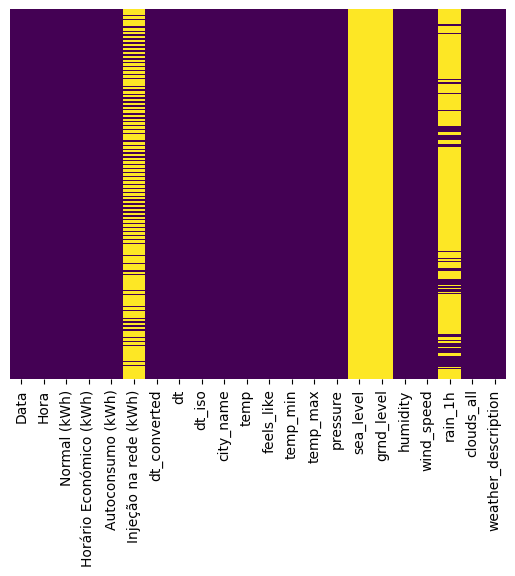

In [24]:
sns.heatmap(data21.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
data22.isnull().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      6087
dt_converted                  0
dt                            0
dt_iso                        0
city_name                     0
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                      0
sea_level                  8760
grnd_level                 8760
humidity                      0
wind_speed                    0
rain_1h                    6862
clouds_all                    0
weather_description           0
dtype: int64

<Axes: >

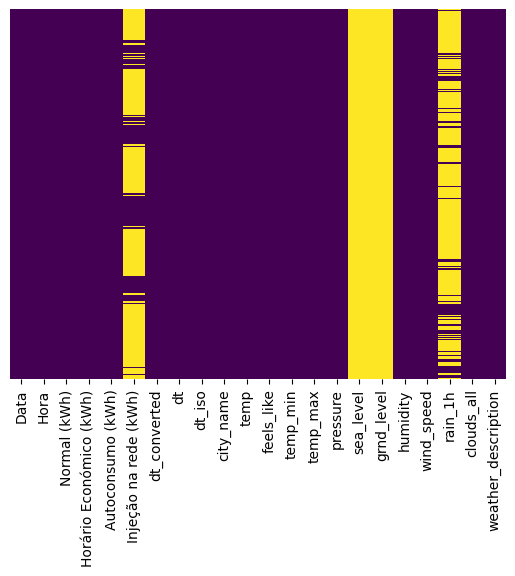

In [26]:
sns.heatmap(data22.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
data21.drop('sea_level', axis=1, inplace=True)
data21.drop('grnd_level', axis=1, inplace=True)
data21.drop('rain_1h', axis=1, inplace=True)
data21.drop('Data', axis=1, inplace=True)
data21.drop('Hora', axis=1, inplace=True)
data21.drop('dt_iso', axis=1, inplace=True)
data21.drop('dt', axis=1, inplace=True)

data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Normal (kWh)             2256 non-null   float64            
 1   Horário Económico (kWh)  2256 non-null   float64            
 2   Autoconsumo (kWh)        2256 non-null   float64            
 3   Injeção na rede (kWh)    566 non-null    object             
 4   dt_converted             2256 non-null   datetime64[ns, UTC]
 5   city_name                2256 non-null   object             
 6   temp                     2256 non-null   float64            
 7   feels_like               2256 non-null   float64            
 8   temp_min                 2256 non-null   float64            
 9   temp_max                 2256 non-null   float64            
 10  pressure                 2256 non-null   int64              
 11  humidity                 2256 

<Axes: >

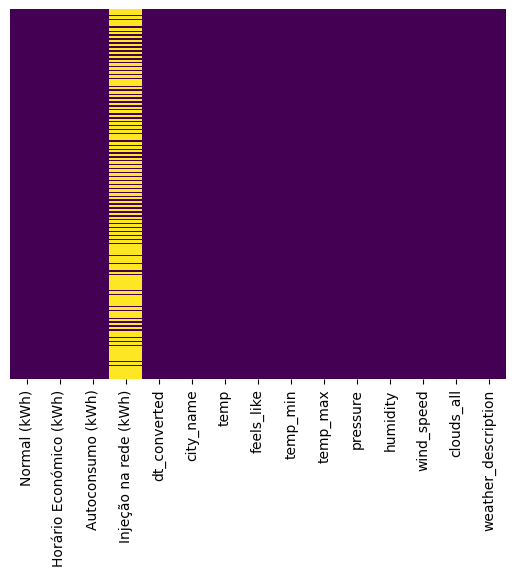

In [28]:
sns.heatmap(data21.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
data22.drop('sea_level', axis=1, inplace=True)
data22.drop('grnd_level', axis=1, inplace=True)
data22.drop('rain_1h', axis=1, inplace=True)
data22.drop('Data', axis=1, inplace=True)
data22.drop('Hora', axis=1, inplace=True)
data22.drop('dt_iso', axis=1, inplace=True)
data22.drop('dt', axis=1, inplace=True)

data22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Normal (kWh)             8760 non-null   float64            
 1   Horário Económico (kWh)  8760 non-null   float64            
 2   Autoconsumo (kWh)        8760 non-null   float64            
 3   Injeção na rede (kWh)    2673 non-null   object             
 4   dt_converted             8760 non-null   datetime64[ns, UTC]
 5   city_name                8760 non-null   object             
 6   temp                     8760 non-null   float64            
 7   feels_like               8760 non-null   float64            
 8   temp_min                 8760 non-null   float64            
 9   temp_max                 8760 non-null   float64            
 10  pressure                 8760 non-null   int64              
 11  humidity                 8760 

<Axes: >

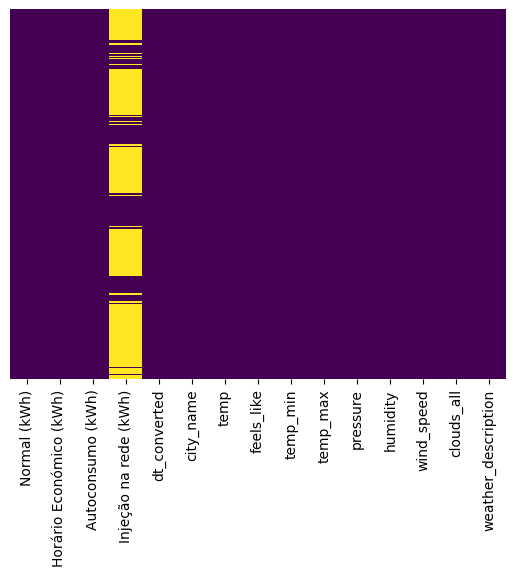

In [30]:
sns.heatmap(data22.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
test.drop('sea_level', axis=1, inplace=True)
test.drop('grnd_level', axis=1, inplace=True)
test.drop('rain_1h', axis=1, inplace=True)
test.drop('Data', axis=1, inplace=True)
test.drop('Hora', axis=1, inplace=True)
test.drop('dt_iso', axis=1, inplace=True)
test.drop('dt', axis=1, inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Normal (kWh)             2256 non-null   float64            
 1   Horário Económico (kWh)  2256 non-null   float64            
 2   Autoconsumo (kWh)        2256 non-null   float64            
 3   dt_converted             2256 non-null   datetime64[ns, UTC]
 4   city_name                1752 non-null   object             
 5   temp                     1752 non-null   float64            
 6   feels_like               1752 non-null   float64            
 7   temp_min                 1752 non-null   float64            
 8   temp_max                 1752 non-null   float64            
 9   pressure                 1752 non-null   float64            
 10  humidity                 1752 non-null   float64            
 11  wind_speed               1752 

<Axes: >

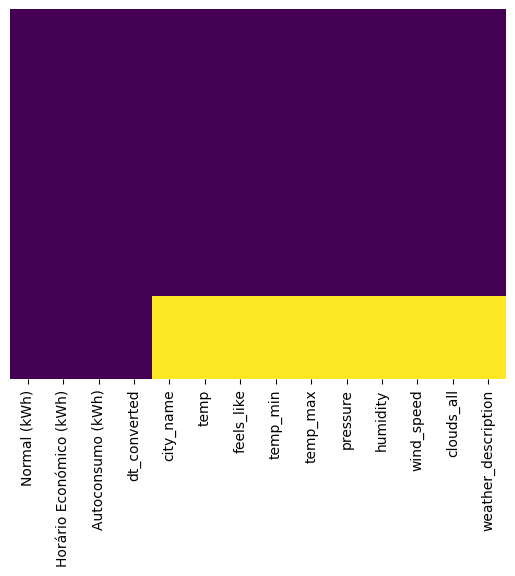

In [32]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
data21.nunique()

Normal (kWh)                772
Horário Económico (kWh)     329
Autoconsumo (kWh)           440
Injeção na rede (kWh)         4
dt_converted               2256
city_name                     1
temp                       1023
feels_like                 1214
temp_min                    245
temp_max                    229
pressure                     35
humidity                     68
wind_speed                  554
clouds_all                  101
weather_description           8
dtype: int64

In [34]:
data22.nunique()

Normal (kWh)               1132
Horário Económico (kWh)     789
Autoconsumo (kWh)           712
Injeção na rede (kWh)         4
dt_converted               8760
city_name                     1
temp                       2277
feels_like                 2585
temp_min                    424
temp_max                    511
pressure                     41
humidity                     82
wind_speed                  761
clouds_all                  101
weather_description           8
dtype: int64

In [35]:
data21.drop('city_name', axis=1, inplace=True)
data22.drop('city_name', axis=1, inplace=True)
test.drop('city_name', axis=1, inplace=True)

In [36]:
data21.nunique()

Normal (kWh)                772
Horário Económico (kWh)     329
Autoconsumo (kWh)           440
Injeção na rede (kWh)         4
dt_converted               2256
temp                       1023
feels_like                 1214
temp_min                    245
temp_max                    229
pressure                     35
humidity                     68
wind_speed                  554
clouds_all                  101
weather_description           8
dtype: int64

In [37]:
data22.nunique()

Normal (kWh)               1132
Horário Económico (kWh)     789
Autoconsumo (kWh)           712
Injeção na rede (kWh)         4
dt_converted               8760
temp                       2277
feels_like                 2585
temp_min                    424
temp_max                    511
pressure                     41
humidity                     82
wind_speed                  761
clouds_all                  101
weather_description           8
dtype: int64

<Axes: >

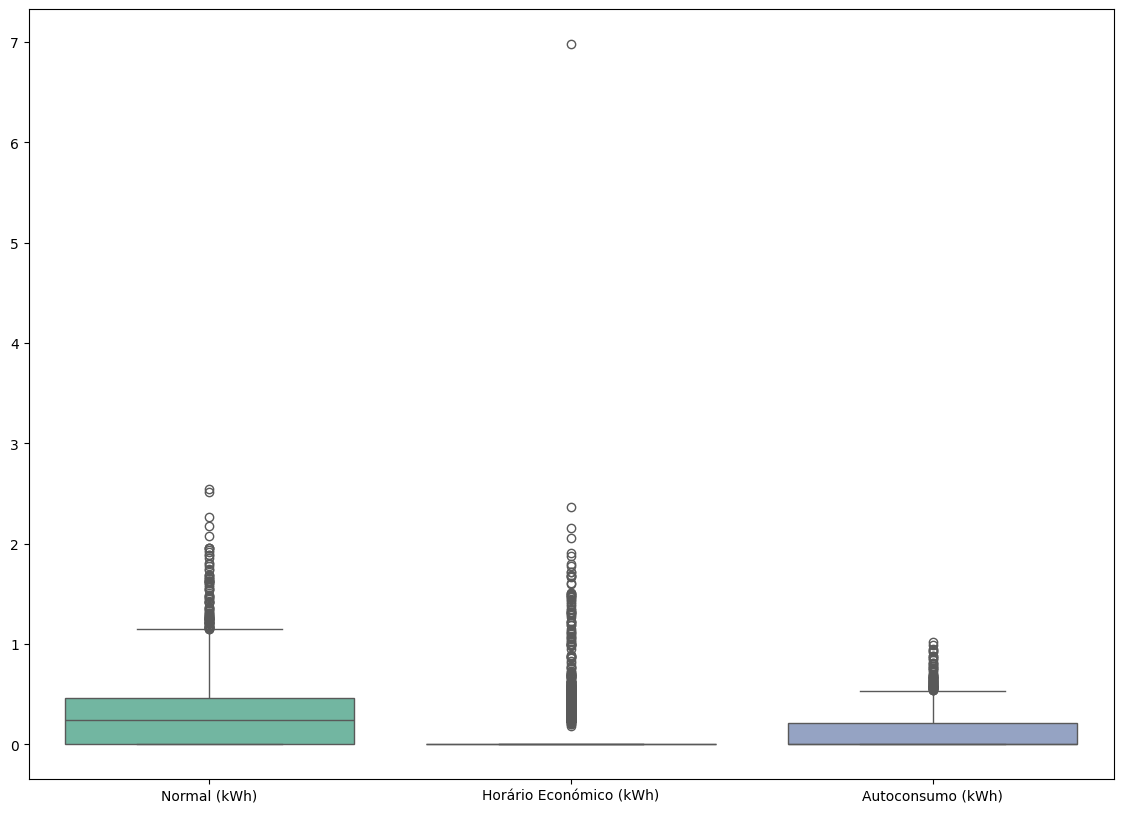

In [39]:
data_energia21 = data21.drop([ 'pressure', 'temp', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 'clouds_all'], axis=1)
plt.subplots(figsize=(14,10))
sns.boxplot(data=data_energia21, orient='v', palette='Set2')

<Axes: >

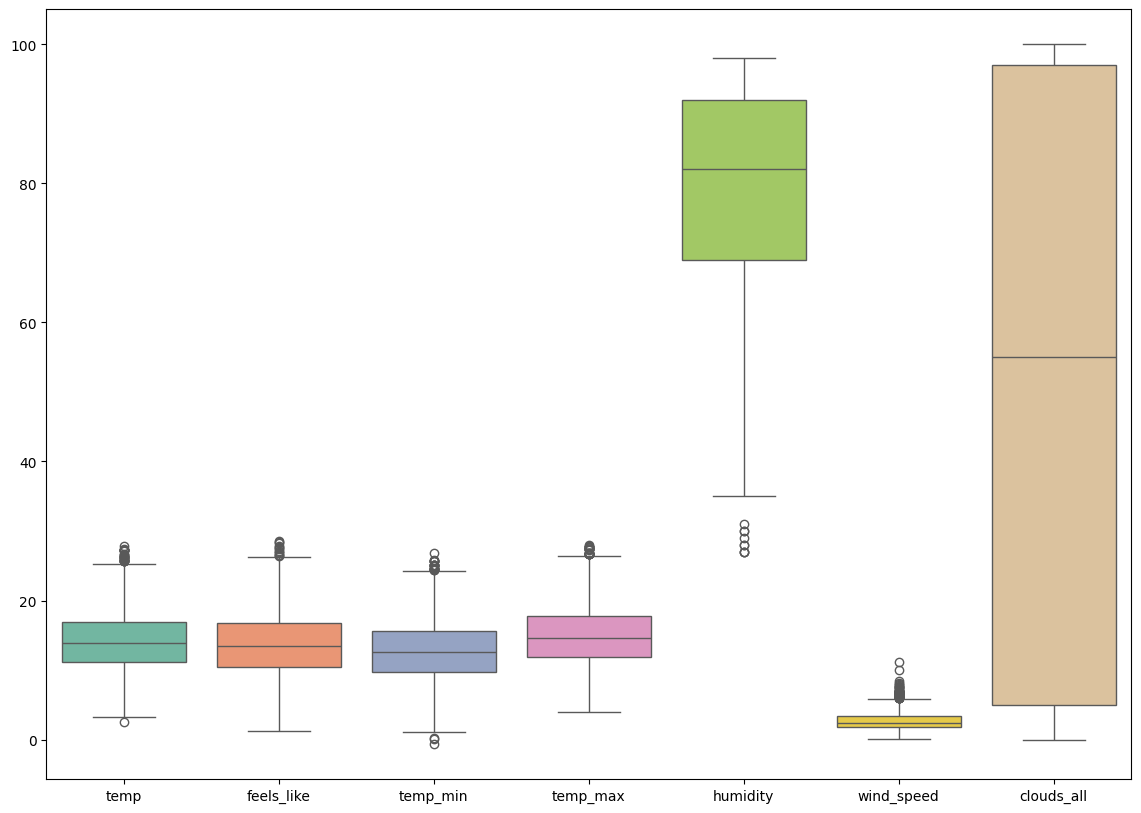

In [40]:
data_meteo21 = data21.drop([ 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)', 'pressure'], axis=1)
plt.subplots(figsize=(14,10))
sns.boxplot(data=data_meteo21, orient='v', palette='Set2')

C:\Users\edini22\AppData\Local\Temp\ipykernel_27728\2751241987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data21['pressure'], orient='v', palette='Set2')


<Axes: xlabel='pressure', ylabel='pressure'>

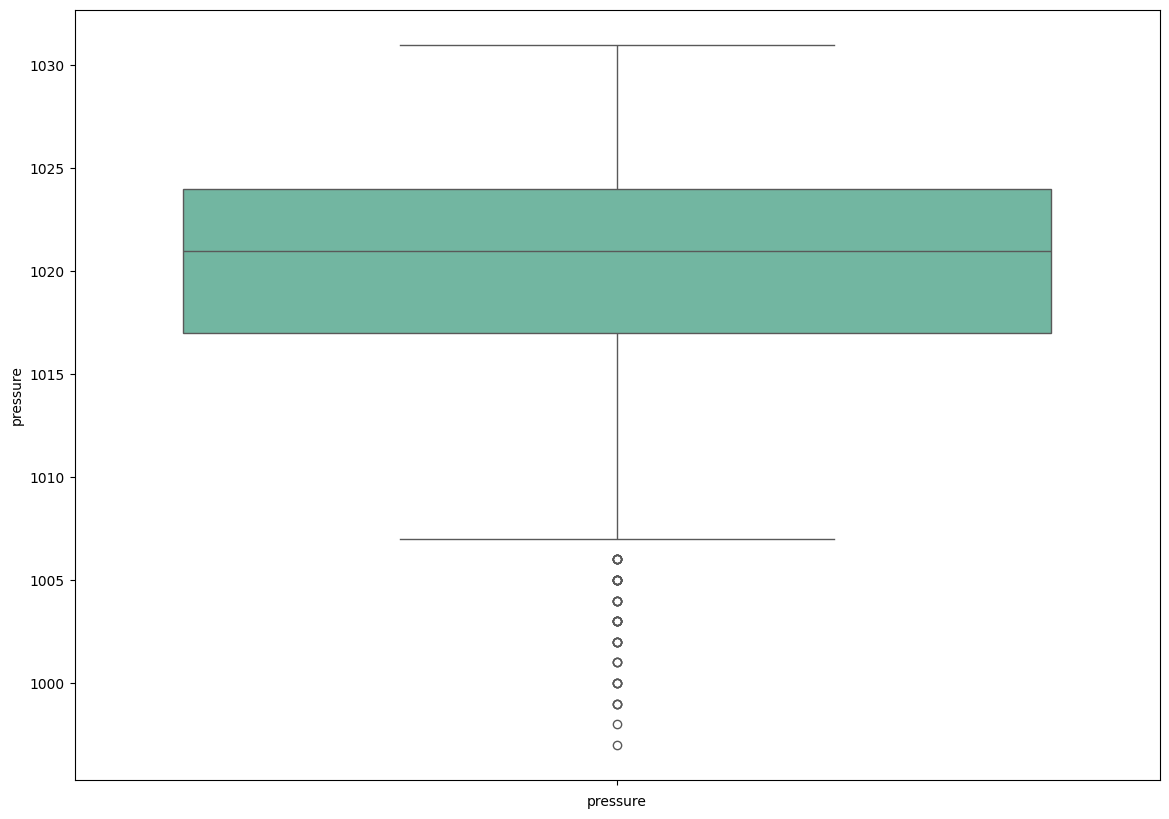

In [41]:
plt.subplots(figsize=(14,10))
plt.xlabel('pressure')
sns.boxplot(data=data21['pressure'], orient='v', palette='Set2')

<Axes: >

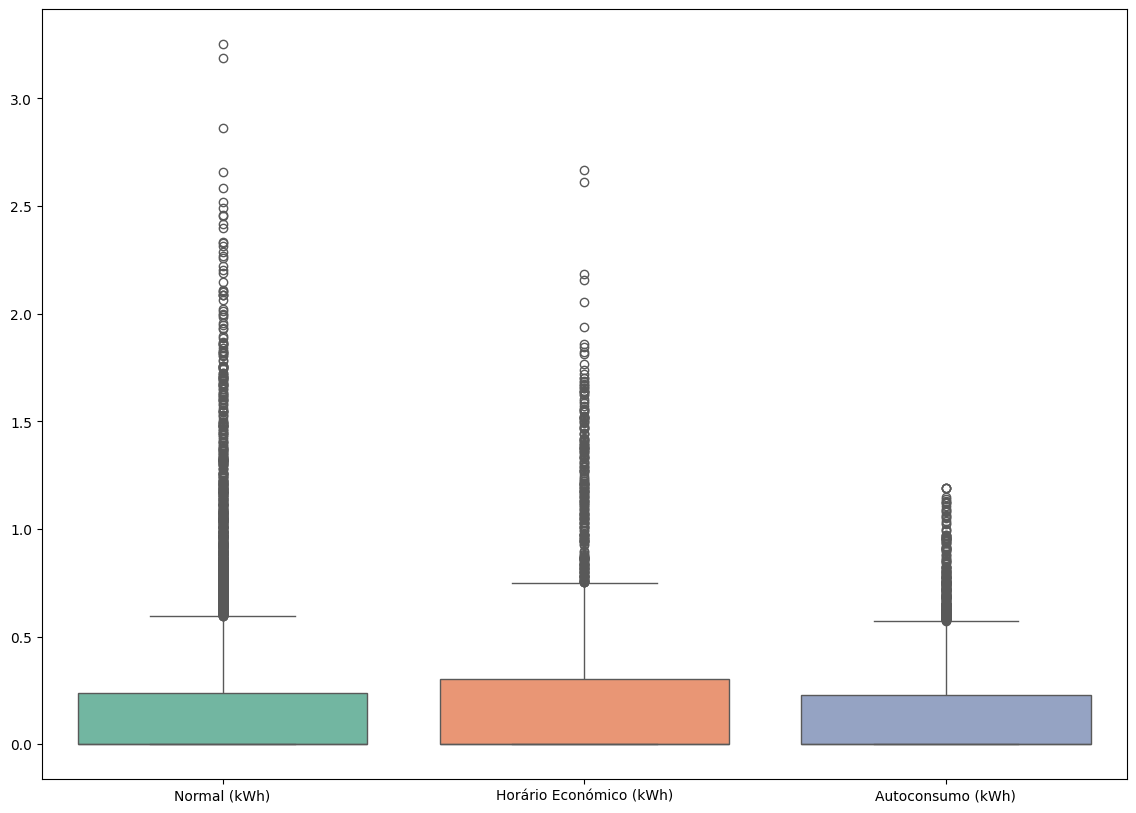

In [42]:
data_energia22 = data22.drop([ 'pressure', 'temp', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 'clouds_all'], axis=1)
plt.subplots(figsize=(14,10))
sns.boxplot(data=data_energia22, orient='v', palette='Set2')

<Axes: >

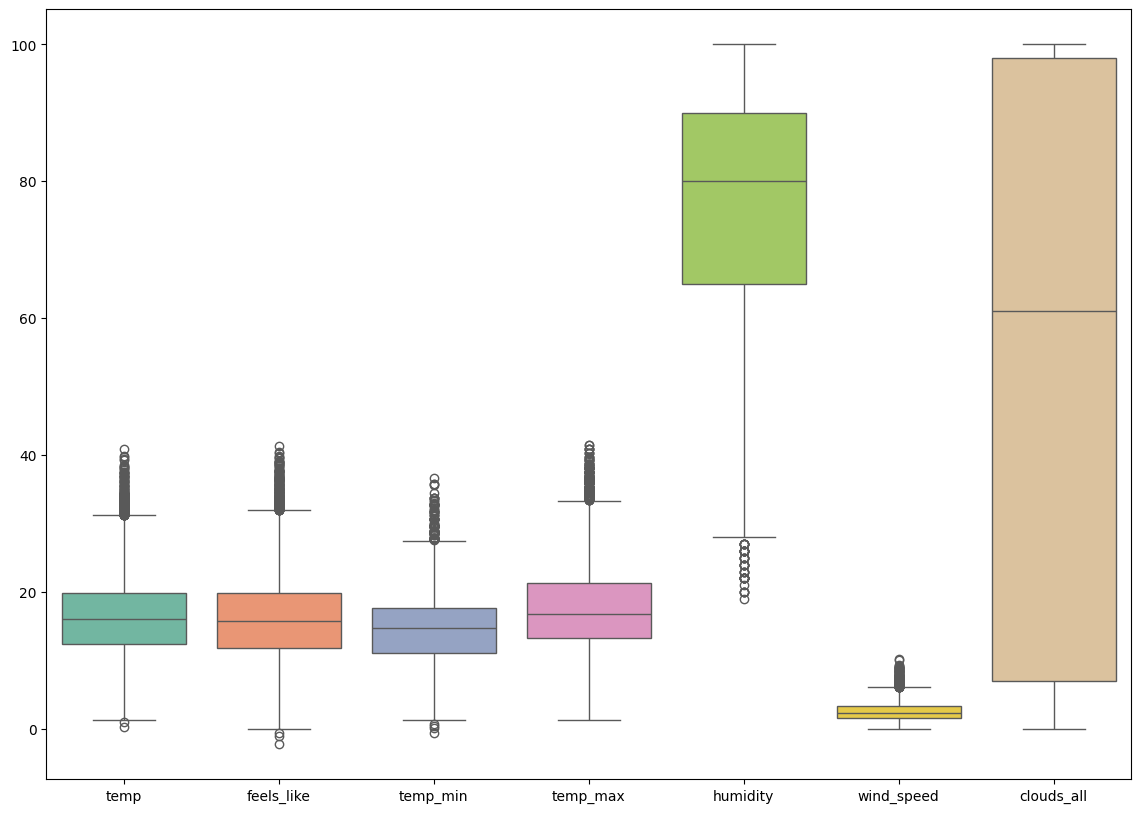

In [43]:
data_meteo22 = data22.drop([ 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)', 'pressure'], axis=1)
plt.subplots(figsize=(14,10))
sns.boxplot(data=data_meteo22, orient='v', palette='Set2')

C:\Users\edini22\AppData\Local\Temp\ipykernel_27728\3778083597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data22['pressure'], orient='v', palette='Set2')


<Axes: xlabel='pressure', ylabel='pressure'>

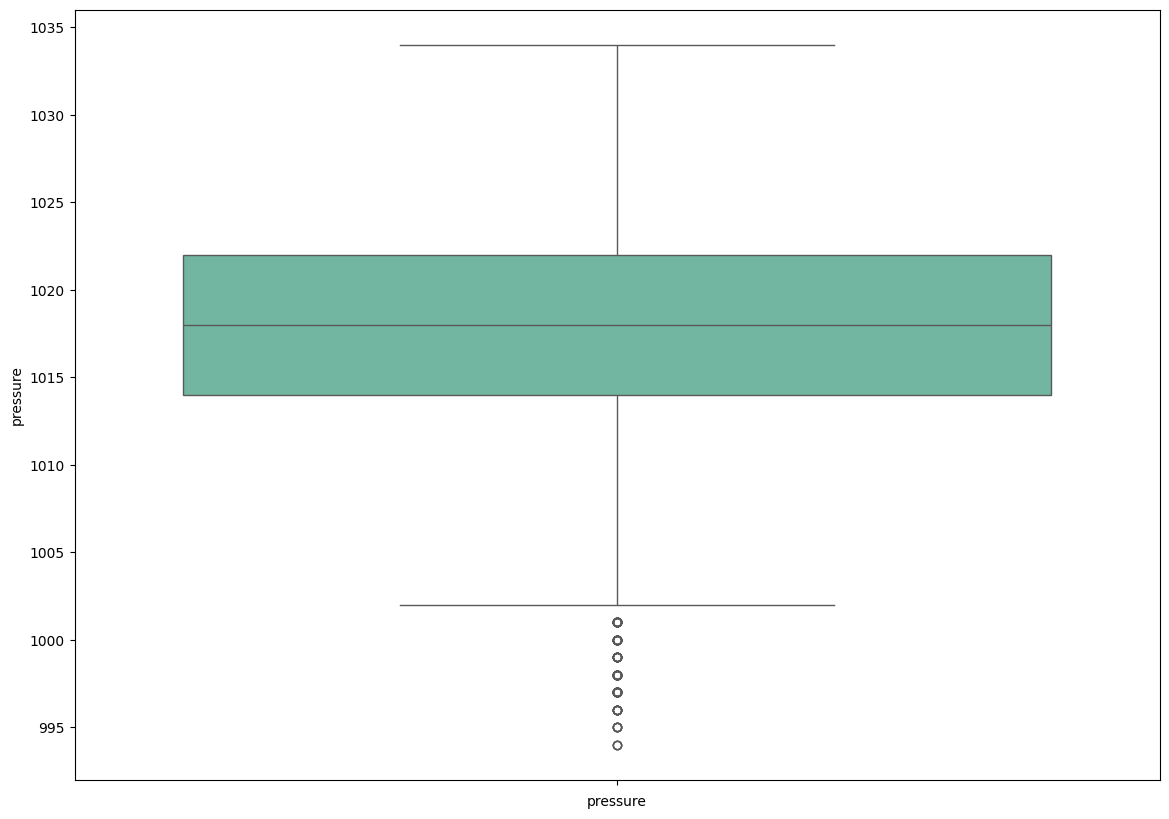

In [44]:
plt.subplots(figsize=(14,10))
plt.xlabel('pressure')
sns.boxplot(data=data22['pressure'], orient='v', palette='Set2')